About Dataset
Content
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Normal/Pneumonia/Covid-19/Tuberculosis). A total of 7135 x-ray images are present.

Acknowledgements
Sources:
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
https://www.kaggle.com/prashant268/chest-xray-covid19-pneumonia
https://github.com/ieee8023/covid-chestxray-dataset

Inspiration
Application of Artificial Intelligence (AI) techniques to detect and classify human diseases from x-ray images

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D,MaxPooling2D
from tensorflow.keras import regularizers,optimizers
from tensorflow.keras.utils import to_categorical
from sklearn .metrics import accuracy_score

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data_path = '/content/drive/MyDrive/CNN_Data/xray_dataset_covid19/train'
test_data_path = '/content/drive/MyDrive/CNN_Data/xray_dataset_covid19/test'

In [39]:
# Create image data generators
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(train_data_path, target_size=(64, 64), batch_size=32,  color_mode='grayscale')
test_generator = datagen.flow_from_directory(test_data_path, target_size=(64, 64), batch_size=32,  color_mode='grayscale')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


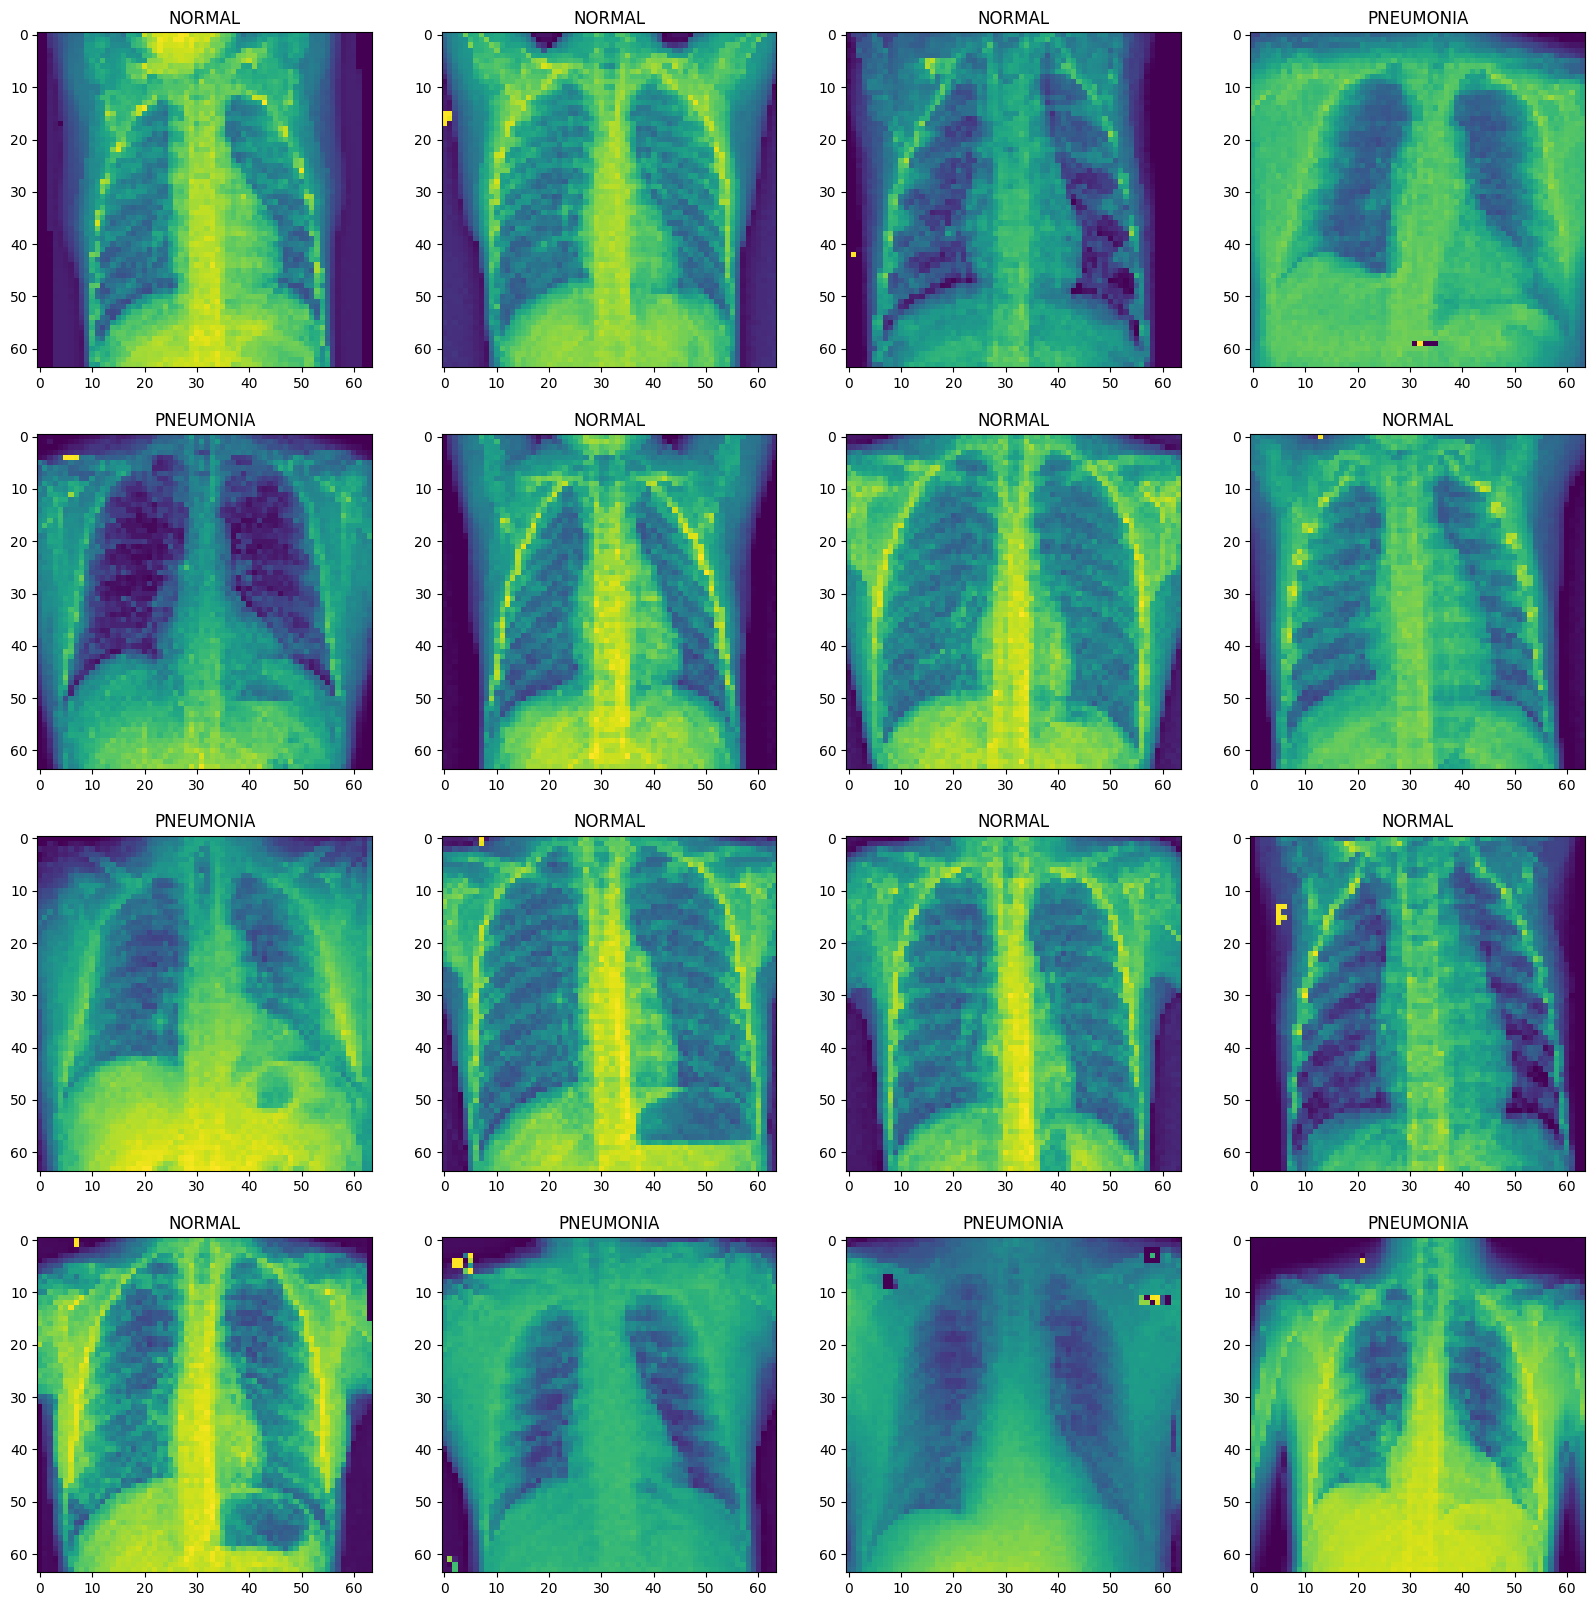

In [40]:
gen_dict = train_generator.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_generator)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 64
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'black' , fontsize= 12)
plt.show();

In [54]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming 2 classes

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 128)        

In [56]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [71]:
model.fit(x = train_generator, validation_data = test_generator, epochs = 10)

Epoch 1/10
5/5 [==============================] - 4s 811ms/step - loss: 0.0297 - accuracy: 0.9865 - val_loss: 0.0440 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 5s 976ms/step - loss: 0.0327 - accuracy: 0.9865 - val_loss: 0.0528 - val_accuracy: 0.9750
Epoch 3/10
5/5 [==============================] - 4s 691ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 0.9750
Epoch 4/10
5/5 [==============================] - 4s 782ms/step - loss: 0.0326 - accuracy: 0.9865 - val_loss: 0.0694 - val_accuracy: 0.9500
Epoch 5/10
5/5 [==============================] - 4s 975ms/step - loss: 0.0321 - accuracy: 0.9865 - val_loss: 0.0545 - val_accuracy: 0.9750
Epoch 6/10
5/5 [==============================] - 4s 783ms/step - loss: 0.0303 - accuracy: 0.9865 - val_loss: 0.1038 - val_accuracy: 0.9500
Epoch 7/10
5/5 [==============================] - 4s 777ms/step - loss: 0.0353 - accuracy: 0.9865 - val_loss: 0.0472 - val_accuracy: 0.9750
Epoch 8/10
5/5 [====

<Axes: >

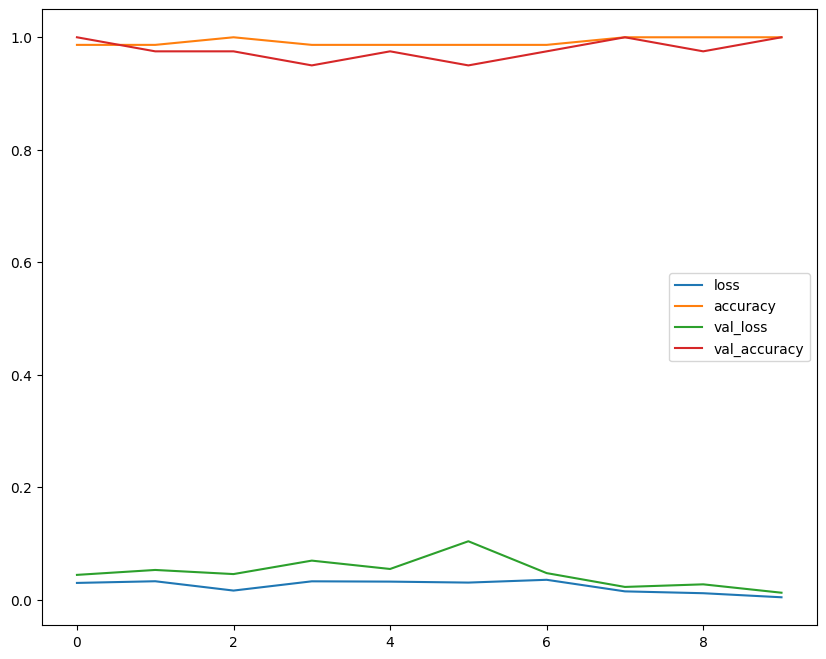

In [72]:
df=pd.DataFrame(model.history.history)
df.plot(figsize=(10,8))

In [73]:
def test_model(model, test_generator):
    # Make predictions on test data
    predictions = model.predict(test_generator)

    # Convert predictions to class labels (0 or 1)
    predicted_classes = np.argmax(predictions, axis=1)

    # Get true labels from the generator
    true_classes = test_generator.classes

    # Calculate accuracy
    accuracy = accuracy_score(true_classes, predicted_classes)

    return accuracy

# Test the model
test_accuracy = test_model(model, test_generator)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 1s 166ms/step
Test Accuracy: 0.55


In [74]:
def predict_image_with_threshold(model, img_path, threshold=0.5):
    # Load the image
    img = image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

    # Make prediction
    prediction = model.predict(img_array)

    # Convert probabilities to binary labels
    if prediction[0][1] > threshold:
        predicted_label = 0  # PNEUMONIA 0
    else:
        predicted_label = 1  # NORMAL 1

    return predicted_label

# Example usage
img_path = '/content/drive/MyDrive/CNN_Data/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg'
predicted_label = predict_image_with_threshold(model, img_path)
print("Predicted Label:", predicted_label)

1/1 [==============================] - 0s 89ms/step
Predicted Label: 0
